<h1 style="text-align: center">EIGENFACES</h1>
<hr>    
Um dos usos mais icônicos da decomposição SVD de matrizes é chamado de eigenfaces. É utilizado a decomposição PCA (uma versão reduzida do SVD, a qual é considerado apenas os elementos mais significativos a matriz final ) em um dataset de treinamento que contém imagens variadas de pessoas. Resultando em uma x de eigenfaces, que servirão como base para reconstruir imagens.

<h3>Importando bibliotecas</h3>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
from PIL import Image

<h3>Construindo a matriz de imagens</h3>

Cada imagem possui uma largura de n pixels e altura de m pixels (m x n). Para facilitar o uso das imagens em uma matriz, cada uma será transformada em um vetor coluna (1 x mn). Como o ilustrado na imagem:
<div style="text-align: center">
    <img src="imagens/ilustraçoes03.png" alt="ilustração das imagens em vetores" width=300>
</div>

In [17]:
# Cria uma lista com todos os nomes das imagens
fotos = [img for img in glob.glob("lfw*/*.jpg")]

# Cria uma matriz nula para comportar os pixels das imagens
m = np.zeros((10000, 250*250))

# Transforma as imagens 250x250 em vetores de 62500 linhas e transforma em uma matriz numpy
for i in range(10000):
  m[i] = np.array(Image.open(fotos[i]).convert('L').getdata())


Temos 2500 imagens e sendo assim nossa matriz terá 2500 colunas. A quantidade de linhas é definida pela multiplicação da largura pela altura da imagem em pixels. Nesse caso 250 x 250 = 62500

<div style="text-align: center">
    <img src="imagens/ilustraçoes01.png" alt="ilustração das imagens em vetores" width=300>
</div>

In [18]:
m.shape

(10000, 62500)

<h3> Decomposição SVD e eigenfaces</h3>

In [99]:

# Quantidade de imagens para o treinamento
faces_de_treinamento = m[:9000]

# Criação da face "média"
face_media = np.mean(faces_de_treinamento, axis = 0)

# Calculo da decomposição svd
X = faces_de_treinamento - np.tile(face_media, (faces_de_treinamento.shape[0], 1))
X = X.T
U, S, VT = np.linalg.svd(X, full_matrices = 0)


# explicar  como achar U, S e VT

Após feita a decomposição SVD, obtemos três matrizes:

<div style="text-align: center">
    <img src="imagens/ilustraçoes02.png" alt="ilustração das imagens em vetores" width=900>
</div>

(-0.5, 249.5, 249.5, -0.5)

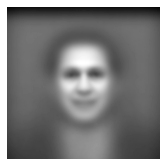

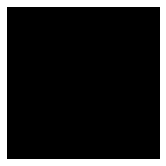

In [96]:
#  Plotando a face média e a primeira coluna das eigenfaces
fig1 =  plt.figure()
ax1 = fig1.add_subplot(122)
img_avg = ax1.imshow(np.reshape(face_media, (250, 250)))
img_avg.set_cmap("gray")
plt.axis("off")

fig1 =  plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(U[:, 0], (250, 250)))
img_avg.set_cmap("gray")
plt.axis("off")


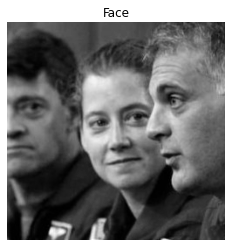

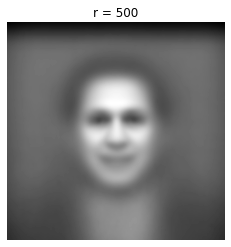

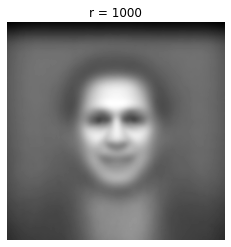

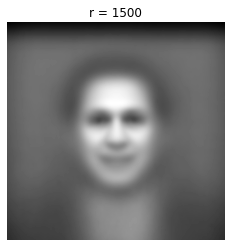

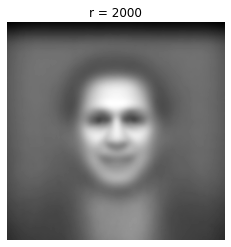

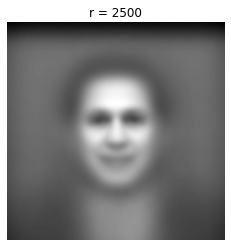

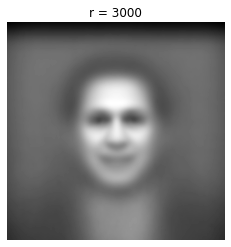

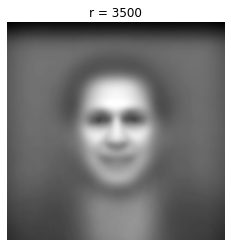

In [98]:
algo = np.array(Image.open("pessoa_crop.jpg").convert('L').getdata())

def reconstrucao(foto, r):
# plotando a imagem de alguem que não está no treinamento
    face_de_teste = foto
    plt.imshow(np.reshape(face_de_teste, (250, 250)))
    plt.set_cmap("gray")
    plt.title("Face")
    plt.axis("off")
    plt.show()

    # Reconstruindo um rosto de uma pessoa que não estava no treinamento
    face_de_testeMS = face_de_teste - face_media
    face_de_testeMS = face_de_testeMS.T
    r_list = range(500, r + 1, 500)

    # plotando a reconstrução com diferentes quantidades de valores principais
    for r in r_list:
        face_de_reconhecimento = face_media.T + np.matmul(U[:,:r], np.matmul(U[:, :r].T, face_de_testeMS))
        img = plt.imshow(np.reshape(face_de_reconhecimento, (250, 250)))
        img.set_cmap("gray")
        plt.title("r = " + str(r))
        plt.axis("off")
        plt.show()

reconstrucao(m[9805], 3500)

<hr>
<div style="text-align: right; font-size: 12px; line-height: 10px;"> 
    <p>Um trabalho feito por:</p>
    <p>Gustavo Sanches</p>
    <p>Kayo Yokoyama</p></div>